# Movie Rating Prediction Project 

**Authors**: Lorent Shabani 
**Project**: Demo (Project 8)  
**Hypothesis**: Can I predict whether I’ll give a movie a high rating (≥4) based on its attributes like genre, release year, and runtime?

This notebook will walk through our process of testing this hypothesis using data from Letterboxd.


# Explanation:
We collected data of movies that Lorent watched for over three years, using an app called **Letterboxd**.
- LetterBoxd is an app created for film "enthusiasts" to log movies and Tv shows that they watch and rate them on a scale from 0-5 stars, with the option to like the movie if it was a film you enjoyed watching.
- In total, I logged 203 films.

I love watching films, Most people read books in their past time but I was never much of a reader, but when I opened up and started watching all kinds of films I got addicted to them. so when I found out about Letterboxd I had to sign up and get started on logging what I watch.
- Doing this made it easier for me to look back and remind myself of what I've watched and enjoyed watching and think about the aspects of that film that made it so enjoyable to watch, and to remind myself of the terrible movies I've seen and laugh at the mere fact of their existence. 

- This app is also great for finding new movies to watch, there are some crazy, thought provoking, and unique films that most people don't know of as well as genres of film that are very underappreciated. From old films from the 1920s to films in the early 2000s, films from different countries like France, Italy, Germany, and everywhere else in the world, it allows you to open up and experience different styles of film making and perspectives that one rarely or never sees. 

# Part 1: Data Preperation

We got our data in two seperate files, our first file **Films I've rated.csv**, which contains all 203 films that I've watched and rated. 

Our second file **Films I've liked** contains all the films that I've liked, which were films that no matter the rating, I still enjoyed it to which I gave it a like.


In [2]:
import pandas as pd

# loads both csv files
liked_df = pd.read_csv('C:/Users/Shaba/Downloads/DA8Demo/Films_ive_liked.csv')
rated_df = pd.read_csv('C:/Users/Shaba/Downloads/DA8Demo/Films_ive_rated.csv')

# displays first 5 rows of each df
print("Liked Movies Data:")
display(liked_df.head())

print("Rated Movies Data:")
display(rated_df.head())


Liked Movies Data:


,Date,Name,Year,Letterboxd URI
0,2022-12-30,Parasite,2019,https://boxd.it/hTha
1,2024-02-18,Eternal Sunshine of the Spotless Mind,2004,https://boxd.it/6YK
2,2024-02-18,La La Land,2016,https://boxd.it/a5fa
3,2024-02-18,Donnie Darko,2001,https://boxd.it/2b2A
4,2024-02-18,Saltburn,2023,https://boxd.it/z4eg


Rated Movies Data:


,Date,Name,Year,Letterboxd URI,Rating
0,2022-12-30,Parasite,2019,https://boxd.it/hTha,4.0
1,2022-12-30,Joker,2019,https://boxd.it/h4cS,5.0
2,2022-12-30,Fight Club,1999,https://boxd.it/2a9q,5.0
3,2022-12-30,The Batman,2022,https://boxd.it/eDGs,4.0
4,2022-12-30,Pulp Fiction,1994,https://boxd.it/29Pq,5.0


## Data Preperation Continued...

We didn't want to have two seperate data sets, with practically the same data, so we decided to merge our liked films data together with our rated films data, so that it was one big data set. To further prepare for our linear regression testing, I made an additional column named **high_rating** so that the original 1–5 movie ratings were converted to a binary variable (1 or 0) so that if it had a high rating of 4 or above It got 1, otherwise it got a 0.

In [3]:
# Add a 'liked' column to rated_df based on whether the movie is in liked_df

# Get the list of liked movie names
liked_movies = liked_df['Name'].unique()

# Create the 'liked' column: 1 if in liked list, 0 otherwise
rated_df['liked'] = rated_df['Name'].apply(lambda x: 1 if x in liked_movies else 0)

# Create the 'high_rating' column: 1 if rating >= 4, else 0
rated_df['high_rating'] = rated_df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Check a sample of the new dataframe
display(rated_df.head())

,Date,Name,Year,Letterboxd URI,Rating,liked,high_rating
0,2022-12-30,Parasite,2019,https://boxd.it/hTha,4.0,1,1
1,2022-12-30,Joker,2019,https://boxd.it/h4cS,5.0,0,1
2,2022-12-30,Fight Club,1999,https://boxd.it/2a9q,5.0,0,1
3,2022-12-30,The Batman,2022,https://boxd.it/eDGs,4.0,0,1
4,2022-12-30,Pulp Fiction,1994,https://boxd.it/29Pq,5.0,0,1


## Data Preperation: Further Enriched Data Set using OMDb Api

To answer our first hypothesis question, we needed the **Genre** and **Runtime** of each film that I've logged, and to do that we found an api from the website **[omdbapi](https://www.omdbapi.com/)** that every detail that you can think of for every movie thats out there. 

- To do this, I used our merged data set that I created and made a program that scraped all of the genres and runtime for each one of the films I"ve logged and added it in a new column on my .csv file next to the designated movie. 
 At this point, we have a merged data set of my liked and rated films with an addition of the genre(s) and runtime of each film.

In [4]:
import requests
import time

#  OMDb API key
api_key = "5283aeb6"

# Function to fetch genre and runtime from OMDb API
def fetch_omdb_data(title):
    try:
        response = requests.get(f"http://www.omdbapi.com/?t={title}&apikey={api_key}")
        data = response.json()
        if data['Response'] == 'True':
            genre = data.get('Genre', 'N/A')
            runtime = data.get('Runtime', 'N/A')
        else:
            genre = 'N/A'
            runtime = 'N/A'
    except Exception as e:
        genre = 'Error'
        runtime = 'Error'
    return pd.Series([genre, runtime])

# Apply to each row
rated_df[['Genre', 'Runtime']] = rated_df['Name'].apply(lambda x: fetch_omdb_data(x))

#  Convert runtime to integer minutes if needed
rated_df['Runtime'] = rated_df['Runtime'].apply(lambda x: int(x.replace(" min", "")) if "min" in x else None)

# Display
display(rated_df.head())

,Date,Name,Year,Letterboxd URI,Rating,liked,high_rating,Genre,Runtime
0,2022-12-30,Parasite,2019,https://boxd.it/hTha,4.0,1,1,"Drama, Thriller",132.0
1,2022-12-30,Joker,2019,https://boxd.it/h4cS,5.0,0,1,"Crime, Drama, Thriller",122.0
2,2022-12-30,Fight Club,1999,https://boxd.it/2a9q,5.0,0,1,"Crime, Drama, Thriller",139.0
3,2022-12-30,The Batman,2022,https://boxd.it/eDGs,4.0,0,1,"Action, Crime, Drama",176.0
4,2022-12-30,Pulp Fiction,1994,https://boxd.it/29Pq,5.0,0,1,"Crime, Drama",154.0


## Part 2: Hypothesis Testing Using Linear Regression (5 Step Test)

My Hypothesis Question:

**Among the two genres I watch most frequently, is one more likely to receive a high rating from me than the other?**

$$
H_0: p_1 = p_2
$$
$$
H_1: p_1 \ne p_2
$$

- $( p_1 )$ = the proportion of movies with high ratings (≥ 4) **in the first (most-watched) genre**.
- $( p_2 )$ = the proportion of movies with high ratings (≥ 4) **in the second (second-most-watched) genre**.

We are comparing these two proportions to determine if the likelihood of giving a high rating is significantly different between the two genres.
**Step 2: Level of Significance:**

$$
\alpha = 0.05
$$

- I decided to go with this level of significance based on the fact that it is an acceptable threshold for social sciences and behavorial studies, and that I'm not working with **serious** data (life or death).


**Step 3: Model Equation (Two-Proportion Z-Test Model):**

$$
z = \frac{(\hat{p}_1 - \hat{p}_2)}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$



Where:

- $( \hat{p}_1 )$ = the proportion of movies with high ratings (≥ 4) in **Genre 1**
- $( \hat{p}_2 )$ = the proportion of movies with high ratings (≥ 4) in **Genre 2**
- $( n_1 )$ = the total number of movies in **Genre 1**
- $( n_2 )$ = the total number of movies in **Genre 2**


## Step 4: Hypothesis Testing — Comparing Proportions Between Genres

### Model Setup and Further Preparation

To evaluate whether there is a statistically significant difference in the proportion of high ratings (≥ 4) between the two genres I watch most often, we are implementing a **two-proportion z-test**.

This test will help determine if one genre is more likely than the other to receive a high rating from me.



### Data Cleaning and Setup

1. **Started with my rated films**  
   We used `rated_df`, which contains my movie ratings along with genres, runtime, and other metadata.

2. **Split multi-label genres into individual flags**  
   Since many movies contain multiple genres (e.g. `"Action, Thriller"`), we:
   - Split the genre string into a list of individual genres
   - Exploded the genre column to create one genre per row

3. **Counted number of movies watched per genre**  
   We calculated how many total movies I’ve watched in each genre to identify the **two most-watched genres** in my dataset.

4. **Filtered to top 2 genres**  
   We selected the **two genres with the highest counts** and kept only those rows for the hypothesis test.

5. **Calculating high rating proportions**  
   For each of the top two genres, we are calculating:
   - The total number of movies
   - The number of movies rated ≥ 4
   - The proportion of high ratings $(( \hat{p}_1 )$ and $( \hat{p}_2 ))$




### Summary

This new hypothesis test allowed us to directly compare the two genres I watch most frequently. By calculating the proportion of high ratings and comparing them using a two-proportion z-test, we can determine whether one genre is statistically more likely to receive high ratings from me than the other.

# Creating the Bar Chart of the Number of Movies Watched Per Genre

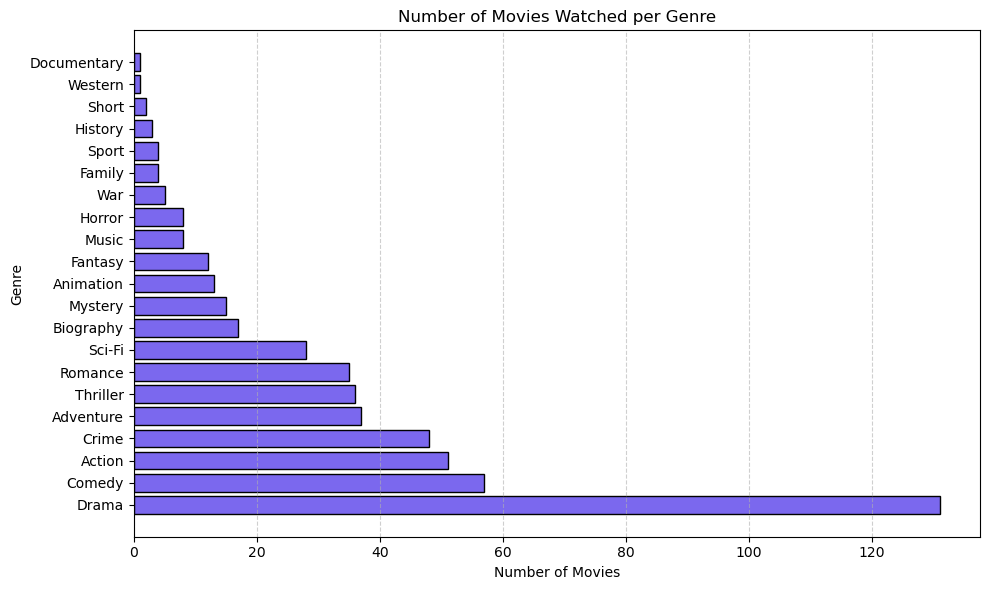

In [5]:
import matplotlib.pyplot as plt

# Copy and clean the data
df = rated_df.copy()
df['GenreList'] = df['Genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
exploded = df.explode('GenreList')

# Count number of movies per genre
genre_counts = exploded['GenreList'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index, genre_counts.values, color='mediumslateblue', edgecolor='black')
plt.title('Number of Movies Watched per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### What This Chart Shows:

- Out of all the genres of movies I've watched, Drama and Comedy happened to be the two I've seen the most
- These will be the two films that I'll be testing to see which genre on average I rate higher than the other.

**Step 4: Hypothesis Testing using linear regression:**

In [6]:
from statsmodels.stats.proportion import proportions_ztest

# Prepare your data
df = rated_df.copy()
df['GenreList'] = df['Genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
df['high_rating'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
exploded = df.explode('GenreList')

# Filter for Drama and Comedy
top2 = exploded[exploded['GenreList'].isin(['Drama', 'Comedy'])]

# Count high ratings and totals for each genre
summary = top2.groupby('GenreList')['high_rating'].agg(['sum', 'count'])
x = summary['sum'].values           # Number of high ratings (≥ 4)
n = summary['count'].values         # Total number of movies in each genre

# Perform two-proportion z-test
z_stat, p_val = proportions_ztest(count=x, nobs=n)

# Output results
print(f"Drama: {x[0]}/{n[0]} high ratings")
print(f"Comedy: {x[1]}/{n[1]} high ratings\n")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Drama: 40/57 high ratings
Comedy: 90/131 high ratings

Z-statistic: 0.2010
P-value: 0.8407


# A visual representation of my model:

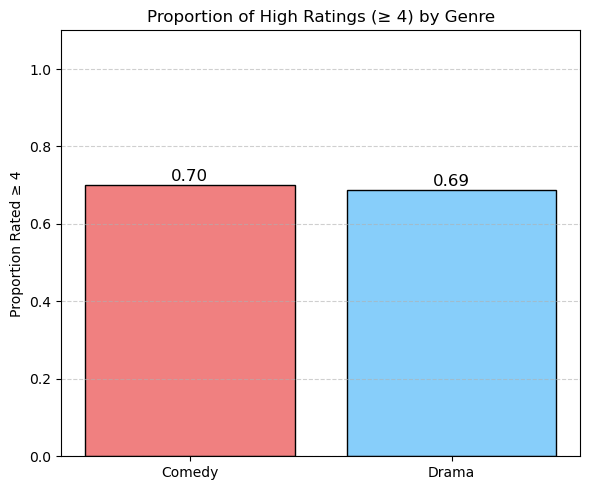

In [7]:
import matplotlib.pyplot as plt

# Calculate proportions
proportions = summary['sum'] / summary['count']

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(proportions.index, proportions.values, color=['lightcoral', 'lightskyblue'], edgecolor='black')

# Add exact values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', fontsize=12)

# Labels and styling
plt.ylim(0, 1.1)
plt.title('Proportion of High Ratings (≥ 4) by Genre')
plt.ylabel('Proportion Rated ≥ 4')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Interpretation of Genre Comparison Chart

The bar chart above compares the proportion of high ratings (≥ 4 stars) I gave to the two genres I’ve watched most frequently: **Comedy** and **Drama**.


- **Comedy:** Approximately **70%** of all Comedy movies I’ve watched received a high rating (≥ 4).
- **Drama:** Approximately **69%** of all Drama movies I’ve watched received a high rating (≥ 4).


### What This Means:

Although Comedy has a slightly higher proportion of high ratings than Drama, the **difference is minimal** — only about 1 percentage point.

This suggests that, based purely on visual inspection:
- There **may not be a meaningful difference** between the two genres in terms of how often I rate them highly.
- However, visual inspection alone isn’t enough — we need to rely on a **formal hypothesis test (two-proportion z-test)** to determine if the observed difference is **statistically significant** or just due to random variation.

> If the p-value from the test is **greater than 0.05**, we will **fail to reject the null hypothesis**, meaning the difference is **not significant**.
> If the p-value is **less than 0.05**, we will **reject the null hypothesis**, concluding that there is a significant difference between the genres.



This chart provides important context for interpreting the test results, and helps us understand whether one genre truly stands out in how often I give it high ratings.
